In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data sets from Excel
Jobmarket01 = pd.read_excel(
    r'C:\Users\analy\Documents\German 2025 Job Market Analysis\02 Data\Original\Job Market Germany data set.xlsx'
)


# Data profiling and cleaning

In [ ]:
Jobmarket01.head()

In [ ]:
Jobmarket01.info()

In [3]:
# removing unneeded columns to minimize the dataframe size(encoded columns for machine learing porpuses were removed)
Jobmarket02 = Jobmarket01.drop(Jobmarket01.columns[34:43], axis=1)


In [4]:
Jobmarket02.head()

,year,month,job_title,industry,experience_level,salary_min_eur,salary_max_eur,salary_median_eur,number_of_openings,demand_index,...,is_high_demand,openings_level,experience_numeric,remote_flag,metro_city,cost_region,city_salary_adjusted_index,job_market_pressure,competitiveness_score,seasonal_hiring_score
0,2025,11,Data Scientist,IT,Entry,45635,63497,54566,25,64,...,1,High,1,0,1,High,70935.8,0.384615,42.630769,4
1,2025,5,Nurse,Healthcare,Senior,63910,96906,80408,7,67,...,1,Medium,3,1,1,High,104530.4,0.102941,62.994118,2
2,2025,12,Data Scientist,IT,Entry,31803,57265,44534,7,31,...,0,Medium,1,0,0,Low,40080.6,0.218750,23.162500,1
3,2025,9,Data Scientist,IT,Mid,44566,97954,71260,17,72,...,1,Medium,2,1,0,Low,64134.0,0.232877,60.734247,4
4,2025,1,Software Engineer,IT,Senior,93762,207782,150772,3,63,...,1,Low,3,0,1,High,196003.6,0.046875,52.706250,1


In [5]:
Jobmarket02.isnull().sum()

year                          0
month                         0
job_title                     0
industry                      0
experience_level              0
salary_min_eur                0
salary_max_eur                0
salary_median_eur             0
number_of_openings            0
demand_index                  0
hiring_trend                  0
city                          0
state                         0
education_requirement         0
job_type                      0
skills_required               0
remote_availability           0
salary_range_eur              0
salary_variability            0
salary_bracket                0
salary_log_median             0
quarter                       0
month_name                    0
season                        0
is_high_demand                0
openings_level                0
experience_numeric            0
remote_flag                   0
metro_city                    0
cost_region                   0
city_salary_adjusted_index    0
job_mark

In [6]:
Jobmarket02.duplicated().sum()

np.int64(0)

In [8]:
# Saving the new data set from Excel
Jobmarket02.to_excel(
    r'C:\Users\analy\Documents\German 2025 Job Market Analysis\02 Data\Original\Job Market Germany data set2.xlsx'
)


# Descriptive Statistics

In [ ]:
Jobmarket02.describe()

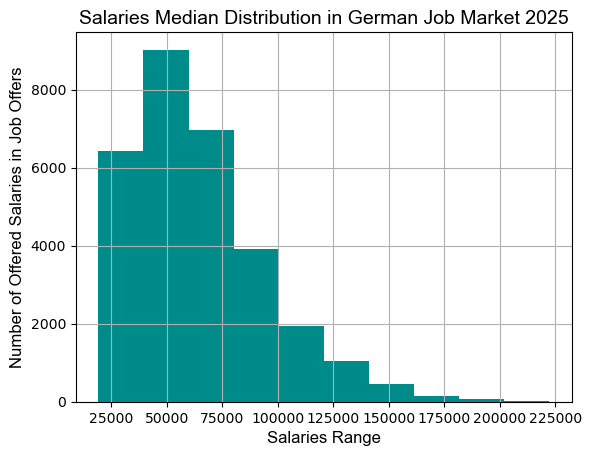

In [9]:
# Salaries median distribution in German Job market 2025
Jobmarket02['salary_median_eur'].hist(color='DarkCyan')

# Add title and axis labels
plt.title("Salaries Median Distribution in German Job Market 2025", 
          fontsize=14, fontname='Arial', color='black')
plt.xlabel("Salaries Range", fontsize=12, fontname='Arial', color='black')
plt.ylabel("Number of Offered Salaries in Job Offers", 
           fontsize=12, fontname='Arial', color='black')
# Save plot
plt.savefig(r"C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\Salries Histogram.png",
            dpi=600, bbox_inches='tight')
plt.show()


The median salries offers Histogram shows a left skewed distribution

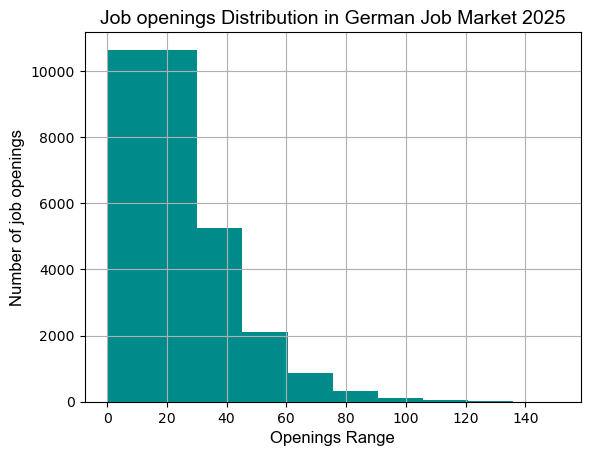

In [11]:
# Job openings distribution in German Job market 2025
Jobmarket02['number_of_openings'].hist(color='DarkCyan')

# Add title and axis labels
plt.title("Job openings Distribution in German Job Market 2025", 
          fontsize=14, fontname='Arial', color='black')
plt.xlabel("Openings Range", fontsize=12, fontname='Arial', color='black')
plt.ylabel("Number of job openings", 
           fontsize=12, fontname='Arial', color='black')
# Save plot
plt.savefig(r"C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\Openings Histogram.png",
            dpi=600, bbox_inches='tight')
plt.show()


Job Openings historgram shows left skewed distribution.

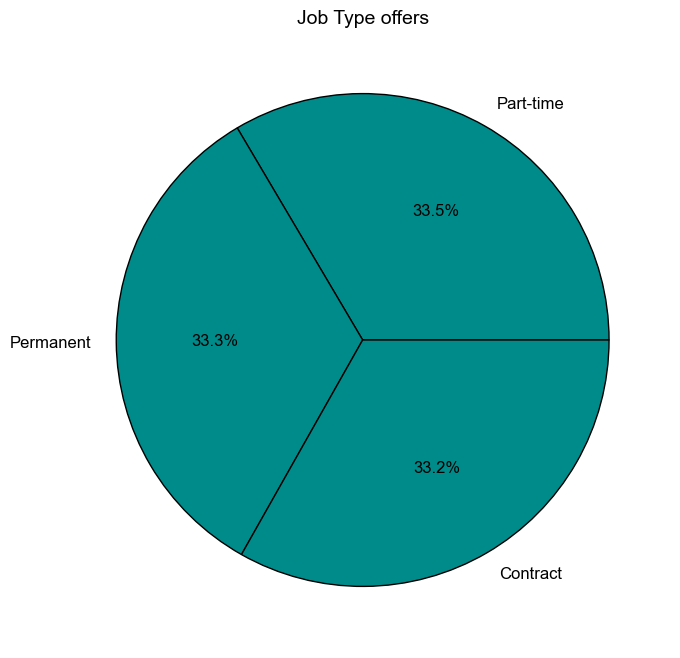

In [13]:
# Count job types
job_counts = Jobmarket02['job_type'].value_counts()

# Set global font to Arial, size 12
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

# Create pie chart with DarkCyan color
plt.figure(figsize=(8,8))
plt.pie(
    job_counts,
    labels=job_counts.index,
    autopct='%1.1f%%',
    colors=['DarkCyan'] * len(job_counts),   # all slices skyblue
    wedgeprops={'edgecolor': 'black'}   # <-- black borders
)

plt.title("Job Type offers", fontsize=14, fontname='Arial')

# Save plot
plt.savefig(r"C:\\Users\\analy\\Documents\\German 2025 Job Market Analysis\\04 Analysis\\Job_type_offers_Pie.png",
            dpi=600, bbox_inches='tight')
plt.show()


In [14]:
# Create the Remote availibility Count Table per job title
remote_counts = pd.crosstab(
    index=Jobmarket02['job_title'],
    columns=Jobmarket02['remote_availability']
)

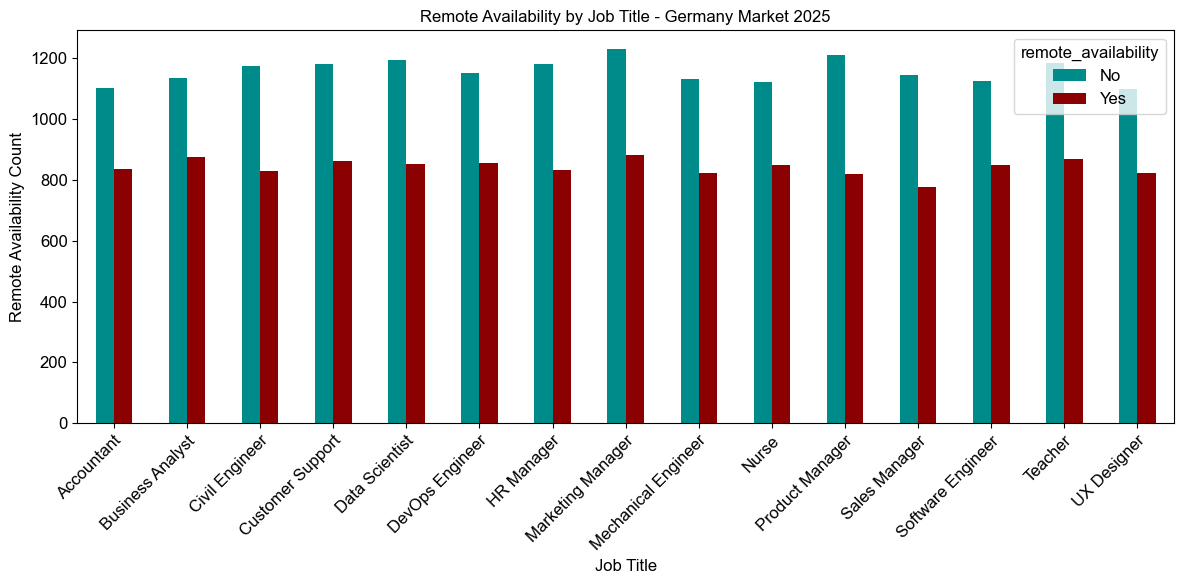

In [16]:
# Create remot availibility figure
fig, ax = plt.subplots(figsize=(12,6))

# Plot grouped bars directly from the crosstab
remote_counts.plot(kind='bar', ax=ax, color=['DarkCyan','DarkRed'])

# Labels and formatting
ax.set_xlabel('Job Title', fontsize=12, fontname='Arial')
ax.set_ylabel('Remote Availability Count', color='black', fontsize=12, fontname='Arial')
ax.tick_params(axis='y', labelcolor='black')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=12, fontname='Arial')
plt.title('Remote Availability by Job Title - Germany Market 2025', fontsize=12, fontname='Arial')

# Save figure
plt.tight_layout()
plt.savefig(r"C:\\Users\\analy\\Documents\\German 2025 Job Market Analysis\\04 Analysis\\Remote_availability_bar_chart.png",
            dpi=600, bbox_inches='tight')
plt.show()
